In [1]:
import tensorflow_federated as tff
import collections
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, InputLayer, Softmax
from tensorflow.keras.models import Sequential

2022-06-29 13:55:59.475307: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-29 13:55:59.475435: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [32]:
import pickle
with open('/home/harinadh_asr2/project/WESAD/S2/S2.pkl', 'rb') as f:
    data = pickle.load(f,encoding='latin1')

In [35]:
acc = pd.DataFrame(data['signal']['chest']['ACC'], columns=['ac_x','ac_y','ac_z'])[1:1000]
ecg = pd.DataFrame(data['signal']['chest']['ECG'], columns =['ECG'])[1:1000]
emg = pd.DataFrame(data['signal']['chest']['EMG'], columns =['EMG'])[1:1000]
eda = pd.DataFrame(data['signal']['chest']['EDA'], columns =['EDA'])[1:1000]
temp = pd.DataFrame(data['signal']['chest']['Temp'], columns =['Temp'])[1:1000]
resp = pd.DataFrame(data['signal']['chest']['Resp'], columns =['RESP'])[1:1000]
df = pd.concat([acc,ecg,emg,eda,temp,resp], axis=1)
df.head()

,ac_x,ac_y,ac_z,ECG,EMG,EDA,Temp,RESP
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194
5,0.8822,-0.1954,-0.4454,0.004898,-0.016479,5.251694,30.125153,-1.165771


In [34]:
ecg

,ECG
1,0.020325
2,0.016525
3,0.016708
4,0.011673
5,0.004898
...,...
995,-0.116501
996,-0.118698
997,-0.128128
998,-0.139709


In [3]:
data['signal']['chest']['ACC'].shape

(4255300, 3)

In [4]:
data['signal']['chest'].keys()

dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])

In [5]:
data['signal']['chest'].keys()

# data['signal']['chest']['ECG'].tolist()

dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])

In [37]:
DATASET_PATH = "./WESAD/"
# federated_data = collections.OrderedDict()
train_dataset_dict = collections.OrderedDict()
test_dataset_dict = collections.OrderedDict()

for root, dirnames, filenames in os.walk(DATASET_PATH, topdown=True):
    for file_name in filenames :
        
        if file_name.endswith('.npy'):
            subject_no = file_name.split('_')[0]
            file_path = os.path.join(root,file_name)

            if os.path.exists(file_path):           
                data = np.load(file_path, allow_pickle=True)
                
                if file_name.endswith('train_data.npy'):
                    print(f'Number of examples in subject {subject_no} for train: ',data.item().get('features').shape[0])
                    train_dataset_dict[subject_no] = collections.OrderedDict((('features', data.item().get('features')),('labels',data.item().get('labels'))))
                elif file_name.endswith('test_data.npy'):
                    print(f'Number of examples in subject {subject_no}: for test ',data.item().get('features').shape[0])
                    test_dataset_dict[subject_no] = collections.OrderedDict((('features', data.item().get('features')),('labels',data.item().get('labels'))))

Number of examples in subject S14: for test  669
Number of examples in subject S17: for test  683
Number of examples in subject S15: for test  670
Number of examples in subject S3: for test  647
Number of examples in subject S16 for train:  1555
Number of examples in subject S10 for train:  1593
Number of examples in subject S6: for test  661
Number of examples in subject S2: for test  637
Number of examples in subject S2 for train:  1484
Number of examples in subject S9 for train:  1537
Number of examples in subject S4: for test  650
Number of examples in subject S8 for train:  1546
Number of examples in subject S6 for train:  1541
Number of examples in subject S9: for test  660
Number of examples in subject S4 for train:  1516
Number of examples in subject S7 for train:  1539
Number of examples in subject S7: for test  660
Number of examples in subject S13: for test  669
Number of examples in subject S13 for train:  1558
Number of examples in subject S11: for test  669
Number of exam

In [43]:
# @tf.function
# def create_tf_dataset_for_client_fn(dataset_path):
#     return tf.data.Dataset.from_tensor_slices(dataset_path)

# p = collections.OrderedDict((('label', 10), ('pixels', 11)))
# np.unique(train_dataset_dict['S4']['labels'], return_counts=True)
pd.DataFrame(train_dataset_dict['S2']['features'], columns=columns).info()
# train_dataset_dict['S2']['features'].shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acc_x_mean  1484 non-null   float64
 1   acc_x_std   1484 non-null   float64
 2   acc_x_max   1484 non-null   float64
 3   acc_x_min   1484 non-null   float64
 4   acc_y_mean  1484 non-null   float64
 5   acc_y_std   1484 non-null   float64
 6   acc_y_max   1484 non-null   float64
 7   acc_y_min   1484 non-null   float64
 8   acc_z_mean  1484 non-null   float64
 9   acc_z_std   1484 non-null   float64
 10  acc_z_max   1484 non-null   float64
 11  acc_z_min   1484 non-null   float64
 12  ecg_mean    1484 non-null   float64
 13  ecg_std     1484 non-null   float64
 14  ecg_max     1484 non-null   float64
 15  ecg_min     1484 non-null   float64
 16  eda_mean    1484 non-null   float64
 17  eda_std     1484 non-null   float64
 18  eda_max     1484 non-null   float64
 19  eda_min     1484 non-null  

In [40]:
columns = [ 'acc_x_mean','acc_x_std','acc_x_max','acc_x_min',
            'acc_y_mean','acc_y_std','acc_y_max','acc_y_min',
            'acc_z_mean','acc_z_std','acc_z_max','acc_z_min',
            'ecg_mean','ecg_std','ecg_max','ecg_min',
            'eda_mean','eda_std','eda_max','eda_min',
            'emg_mean','emg_std', 'emg_max', 'emg_min',
            'Resp_mean','Resp_std','Resp_max','Resp_min',
            'Temp_mean', 'Temp_std','Temp_max','Temp_min'
            ]

len(columns)

32

In [44]:
tff_dataset = tff.simulation.datasets.TestClientData(train_dataset_dict)
tff_dataset_test = tff.simulation.datasets.TestClientData(train_dataset_dict)

In [5]:
# tff_dataset.client_ids
2022*700

1415400

In [6]:
tff_dataset.element_type_structure

OrderedDict([('features',
              TensorSpec(shape=(32,), dtype=tf.float64, name=None)),
             ('labels', TensorSpec(shape=(), dtype=tf.int64, name=None))])

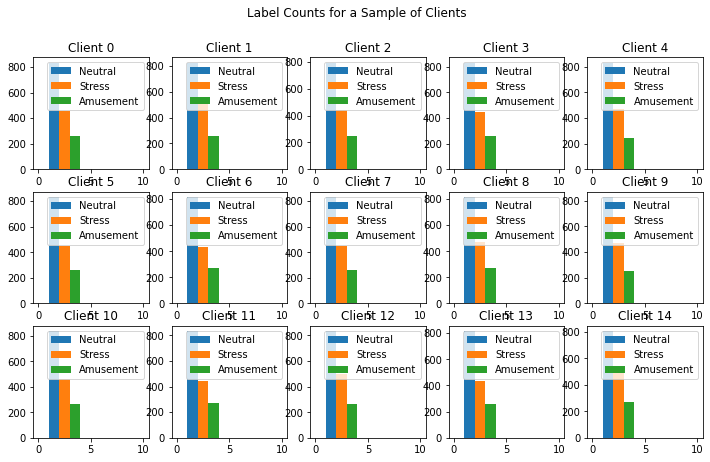

In [65]:
# Number of examples per layer for a sample of clients
f = plt.figure(figsize=(12, 7))
f.suptitle('Label Counts for a Sample of Clients')
for i in range(15):
  client_dataset = tff_dataset.create_tf_dataset_for_client(
      tff_dataset.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    # Append counts individually per label to make plots
    # more colorful instead of one color per plot.
    label = example['labels'].numpy()
    plot_data[label].append(label)
  plt.subplot(3, 5, i+1)
  plt.title('Client {}'.format(i))
  for j in range(1,4):
    plt.hist(
        plot_data[j],
        density=False,
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    plt.legend(['Neutral','Stress','Amusement'])

* The data from different client is same and not showing Non-IID characteristics.
* For now, lets go with creating a federated model and come back later to simulate real time federate characteristics.

In [62]:
plot_data[1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [66]:
example_dataset = tff_dataset.create_tf_dataset_for_client(tff_dataset.client_ids[0])

In [67]:
NUM_CLIENTS = 15
NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 200
PREFETCH_BUFFER = 10

def preprocess_fn(dataset):

  def batch_format_fn(element,epsilon=1e-8):
    """Flatten a batch `features` and return the features as an `OrderedDict`."""

    mean, variance = tf.nn.moments(element['features'], axes=[0])
    element['features']  = (element['features']  - mean) / tf.sqrt(variance + epsilon) 
    
    return collections.OrderedDict(
        x=tf.reshape(element['features'], [-1, 32]),
        y=tf.reshape(element['labels'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [10]:
data  = preprocess_fn(example_dataset)
sample_batch  = tf.nest.map_structure(lambda x: x.numpy(), 
                                        next(iter(data)))

In [11]:
def make_federated_data(client_data, client_ids):
  return [
      preprocess_fn(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

* tf.data.Dataset API
* tff.simulation.datasets.ClientData API


In [12]:
sample_clients = tff_dataset.client_ids[:NUM_CLIENTS]

federated_train_data = make_federated_data(tff_dataset, sample_clients)

print(f'Number of client datasets: {len(federated_train_data)}')
print(f'First dataset: {federated_train_data[0]}')

Number of client datasets: 15
First dataset: <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 32), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>


In [13]:
def create_keras_model():

  return tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(32,)),
      # tf.keras.layers.Dense(15, kernel_initializer='glorot_uniform'),
      # tf.keras.layers.Dense(20, kernel_initializer='zeros'),
      tf.keras.layers.Dense(10,kernel_initializer='glorot_uniform', ),
      # kernel_regularizer=tf.keras.regularizers.l2(.0001)),
      tf.keras.layers.Softmax()
      
  ])

In [14]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=data.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
      )

In [15]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.01))

In [16]:
print(iterative_process.initialize.type_signature.formatted_representation())

( -> <
  model=<
    trainable=<
      float32[32,10],
      float32[10]
    >,
    non_trainable=<>
  >,
  optimizer_state=<
    int64,
    float32[32,10],
    float32[10],
    float32[32,10],
    float32[10]
  >,
  delta_aggregate_state=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  model_broadcast_state=<>
>@SERVER)


In [17]:
state = iterative_process.initialize()

In [18]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7596123), ('loss', 0.9711003), ('num_examples', 157350), ('num_batches', 7873)]))])


In [19]:
NUM_ROUNDS = 20
# for round_num in range(2, NUM_ROUNDS):
#   state, metrics = iterative_process.next(state, federated_train_data)
#   print('round {:2d}, metrics={}'.format(round_num, metrics))

In [20]:
logdir = "/tmp/logs/scalars/training/"
summary_writer = tf.summary.create_file_writer(logdir)
state = iterative_process.initialize()

with summary_writer.as_default():
  for round_num in range(1, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_train_data)
    # state = result.state
    # metrics = result.metrics
    for name, value in metrics['train'].items():
      tf.summary.scalar(name, value, step=round_num)

In [21]:
metrics

OrderedDict([('broadcast', ()),
             ('aggregation',
              OrderedDict([('mean_value', ()), ('mean_weight', ())])),
             ('train',
              OrderedDict([('sparse_categorical_accuracy', 0.89471877),
                           ('loss', 0.46316466),
                           ('num_examples', 157350),
                           ('num_batches', 7873)]))])

In [28]:
!ls {logdir}
%tensorboard --logdir {logdir} --port=0


events.out.tfevents.1656457054.instance-1.37758.1.v2


UsageError: Line magic function `%tensorboard` not found.


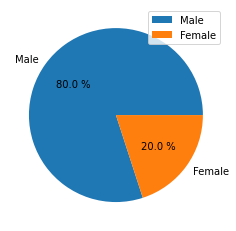

In [30]:
s = pd.Series(['Male', 'Male', 'Male', 'Male', 'Male', 'Male','Male','Male','Male','Male','Male','Male','Female','Female','Female'])
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True)
plt.savefig('great.png')

In [22]:
evaluation = tff.learning.build_federated_evaluation(model_fn)

In [23]:
sample_clients = tff_dataset_test.client_ids[:NUM_CLIENTS]
federated_test_data = make_federated_data(tff_dataset_test, sample_clients)

In [24]:
model_weights = iterative_process.get_model_weights(state)
test_metrics = evaluation(model_weights, federated_test_data)
test_metrics

OrderedDict([('eval',
              OrderedDict([('sparse_categorical_accuracy', 0.66506517),
                           ('loss', 1.1878057),
                           ('num_examples', 157350),
                           ('num_batches', 7873)]))])

In [25]:
print(evaluation.type_signature.formatted_representation())

(<
  server_model_weights=<
    trainable=<
      float32[32,10],
      float32[10]
    >,
    non_trainable=<>
  >@SERVER,
  federated_dataset={<
    x=float64[?,32],
    y=int64[?,1]
  >*}@CLIENTS
> -> <
  eval=<
    sparse_categorical_accuracy=float32,
    loss=float32,
    num_examples=int64,
    num_batches=int64
  >
>@SERVER)


In [26]:
model_weights = iterative_process.get_model_weights(state)
train_metrics = evaluation(model_weights, federated_test_data)
train_metrics

OrderedDict([('eval',
              OrderedDict([('sparse_categorical_accuracy', 0.66493803),
                           ('loss', 1.1855253),
                           ('num_examples', 157350),
                           ('num_batches', 7873)]))])

In [27]:
logdir = "/tmp/logs/scalars/testing/"
summary_writer = tf.summary.create_file_writer(logdir)
state = iterative_process.initialize()

with summary_writer.as_default():
  for round_num in range(1, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_test_data)
    # state = result.state
    # metrics = result.metrics
    for name, value in metrics['train'].items():
      tf.summary.scalar(name, value, step=round_num)

In [ ]:
!ls {logdir}
%tensorboard --logdir {logdir} --port=0

In [ ]:
################################### MERGE SORT -- 2 WAY MERGE ###################################################################
l1 = [1,3,5,7,9,11,13]
l2 = [2,4,6,8,10]
l3 = [12,14,15,16,17,18]
l4 = [11,14,22,24,29]

i,j,k,l = 0,0,0,0
x = 0
m1 = []
m2 = []
m = []
while i<len(l1) and j<len(l2) : #4-way merging --> generally m-way merging
    if l1[i]<l2[j]:
        m1.append(l1[i])
        i+=1
    else:
        m1.append(l2[j])
        j+=1

if i<len(l1):
    m1.extend(l1[i:])

if j<len(l2):
    m1.extend(l2[j:])

while k<len(l3) and l<len(l4):
    if l3[k]<l4[l]:
        m2.append(l3[k])
        k+=1
    else:
        m2.append(l4[l])
        l+=1

if k<len(l3):
    m2.extend(l3[k:])

if l<len(l4):
    m2.extend(l4[l:])

i,j = 0,0
print(m1,m2)

while i<len(m1) and j<len(m2) : #4-way merging --> generally m-way merging
    if m1[i] < m2[j]:
        m.append(m1[i])
        i+=1
    else:
        m.append(m2[j])
        j+=1
if i<len(m1):
    m.extend(m1[i:])

if j<len(m2):
    m.extend(m2[j:]) 

print(m)

## Differential Privacy

In [2]:
@tff.federated_computation
def hello_world():
  return 'Hello, World!'

hello_world()

2022-06-29 13:56:28.954927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-29 13:56:28.955173: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-29 13:56:28.955227: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-1): /proc/driver/nvidia/version does not exist
2022-06-29 13:56:28.956103: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


b'Hello, World!'